# Charge Density

Here code examples for charge and spin densities are given.

**NOTE**

So far due to the efficiency concerns, only 2D densities are available. Developers are working actively to address the 3D plotting issues.

## The 'read_ECHG' method

This method is defined in the `crystal_io.Properties_output` class, which read formatted output files generated by CRYSTAL and return to the `electronics.ChargeDensity` class. It requires the Crgra2006 (fort.25) file.

The standard screen output is required to identify the indices of corresponding 2D data maps. Otherwise the code only reads the first 2D data map.

Read an 'ECHG' calculation and return to a `electronics.ChargeDensity` class. The `data` attribute is a nX\*nY\*nspin array.

In [1]:
from CRYSTALpytools.crystal_io import Properties_output

chg = Properties_output('dens_grapheneMV.out').read_ECHG('dens_grapheneMV.f25')
print('Spin: {:d}'.format(chg.spin))
print('Base vectors (point A, B, C):')
print(chg.base)
print('Data dimensionality:')
print(chg.data.shape)

Spin: 2
Base vectors (point A, B, C):
[[ 6.72393731 -3.93750179  0.        ]
 [ 0.          0.          0.        ]
 [-0.04799637  7.79181692  0.        ]]
Data dimensionality:
(100, 100, 2)


With the `method` input the user can substract the difference of charge between inputs of arbitrary length. Data is substracted from the first entry based on the following entries.

Since the 'spin' dimension is somewhat 'meaningless', the returned object has no spin dimension.

For multiple entries, make sure the charge (spin) density is the first (second) 2D grid data ('-%-MAPN') in the fort.25 files because the code does not check the output in this case. Warnings is generated.

In [2]:
dchg = Properties_output().read_ECHG('dens_grapheneMV.f25',
                                     'dens_grapheneMV_PATO.f25',
                                     method='substract')
print('Spin: {:d}'.format(dchg.spin))
print('Data dimensionality:')
print(dchg.data.shape)

Spin: 1
Data dimensionality:
(100, 100, 1)


/tmp/ipykernel_688/2111153245.py:1: UserWarning: Properties output file not found: Only the first 1 (2) density map(s) will be read for spin=1(2).
  dchg = Properties_output().read_ECHG('dens_grapheneMV.f25',
/home/huanyu/apps/anaconda3/envs/crystal_py3.9/lib/python3.9/site-packages/CRYSTALpytools/electronics.py:553: UserWarning: Properties output file not found: Only the first 1 (2) density map(s) will be read for spin=1(2).
  obj = Properties_output().read_ECHG(i, method='normal')


A safer way is to generate 2 `ChargeDensity` objects (see the next section) for 2 files separately and call the `substract` method.

In [3]:
from CRYSTALpytools.electronics import ChargeDensity

dchg = Properties_output('dens_grapheneMV.out').read_ECHG('dens_grapheneMV.f25')
pato = Properties_output('dens_grapheneMV_PATO.out').read_ECHG('dens_grapheneMV_PATO.f25')
dchg = dchg.substract(pato)

print('Spin: {:d}'.format(dchg.spin))
print('Data dimensionality:')
print(dchg.data.shape)

Spin: 1
Data dimensionality:
(100, 100, 1)


The 'substract' method also allows for a single fort.25 file including both 'normal' and 'PATO' charge densities. The screen output is required, otherwise the code only reads the first 2D map data.

In [4]:
dchg = Properties_output('dens_mgoDCHG.out').read_ECHG('dens_mgoDCHG.f25', method='substract')
print('Spin: {:d}'.format(dchg.spin))
print('Data dimensionality:')
print(dchg.data.shape)

Spin: 1
Data dimensionality:
(65, 65, 1)


## 'electronics.ChargeDensity' class

The `electronics.ChargeDensity` class has object-oriented methods for data analysis and plotting. It is designed to be applicable to systems with 1 to 3D though by July 2024, 3D plotting is still under developing.

### Instantiatation

The classmethod `from_file` is a wrapper of I/O functions introduced above. For spin-polarized systems, the user can also save the data in $\alpha$ and $\beta$ states rather than charge density ($\alpha+\beta$) and spin density ($\alpha-\beta$).

In [5]:
from CRYSTALpytools.electronics import ChargeDensity

chg = ChargeDensity.from_file('dens_grapheneMV.f25',
                              output='dens_grapheneMV.out', method='alpha_beta')

### Quick plotting

The `plot_2D()` method helps to visualize the charge / spin densities.

Plot them together with default setups (color-filled contour plot):

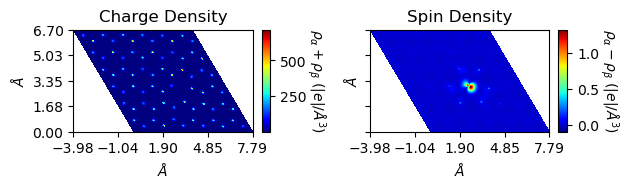

In [6]:
from CRYSTALpytools.electronics import ChargeDensity

fig = ChargeDensity.from_file('dens_grapheneMV.f25',
                              output='dens_grapheneMV.out').plot_2D()

Not nice. Change the settings of `levels` for plot levels and range, and `figsize` for figure size.

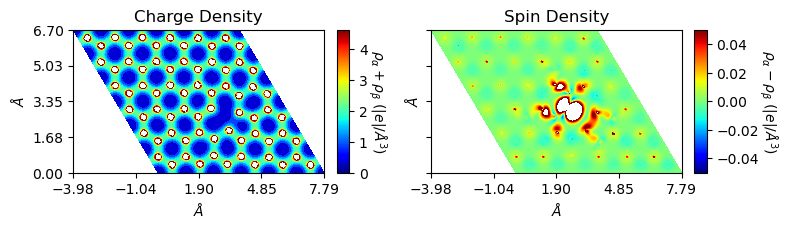

In [7]:
from CRYSTALpytools.electronics import ChargeDensity
import numpy as np

chglevel = np.log(np.linspace(1, 100, 100))
spinlevel = np.linspace(-0.05, 0.05, 100)

chg = ChargeDensity.from_file('dens_grapheneMV.f25', output='dens_grapheneMV.out')
fig = chg.plot_2D(levels=[chglevel, spinlevel], figsize=[8, 4])

In this example, the plot is non-orthogonal. The user can get orthogonal plot by setting `rectangle=True`. The cmode moves the non-orthogonal part on the right to the left hand side, i.e., similar to the 'RECTANGU' keyword of 'MAPNET' (see CRYSTAL manual).

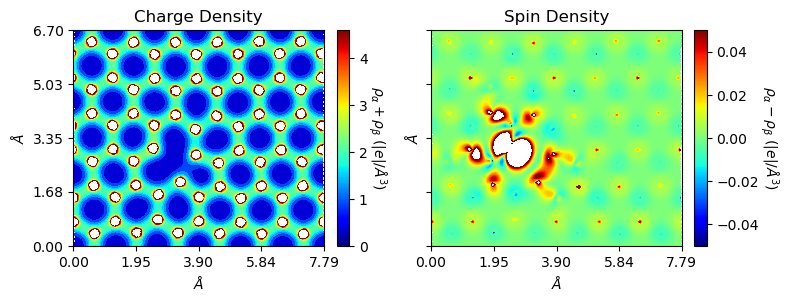

In [8]:
from CRYSTALpytools.electronics import ChargeDensity
import numpy as np

chglevel = np.log(np.linspace(1, 100, 100))
spinlevel = np.linspace(-0.05, 0.05, 100)

chg = ChargeDensity.from_file('dens_grapheneMV.f25', output='dens_grapheneMV.out')
fig = chg.plot_2D(levels=[chglevel, spinlevel], figsize=[8, 6], rectangle=True)

The monovacancy is off-center after rectangle plotting. The user can modify periodicity by setting `a_range` and `b_range`. Both of them uses fractional coordinates of plot base vector. If they are used with `rectangle=True`, that refers to the **old, non-orthogonal** base vectors. The origin of plotting axes are always 0. To avoid influences of periodic boundaries, supercell sizes, i.e., `a_range[1]-a_range[0]` and `b_range[1]-b_range[0]` must be integers. 

By setting `lineplot=True` and `colorplot=False`, contour lines is plotted. If both are 'True', contour lines are overlapped with color plots (not looking good with this example). Solid lines for positive values and 0 (doubled width). Dotted lines for negative values.

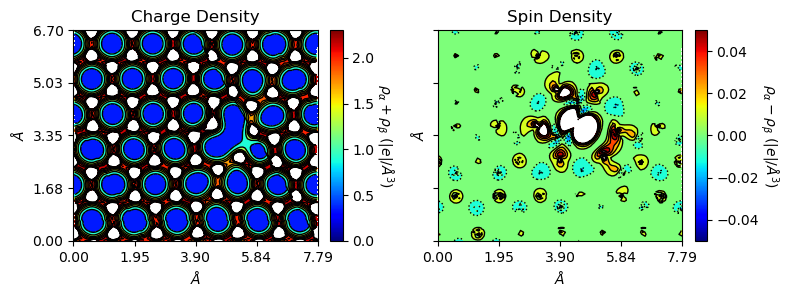

In [9]:
from CRYSTALpytools.electronics import ChargeDensity
import numpy as np

chglevel = np.log(np.linspace(1, 10, 10))
spinlevel = np.linspace(-0.05, 0.05, 10)

chg = ChargeDensity.from_file('dens_grapheneMV.f25', output='dens_grapheneMV.out')
fig = chg.plot_2D(levels=[chglevel, spinlevel], figsize=[8, 6], lineplot=True, colorplot=True,
                  a_range=[-0.3, 0.7], b_range=[-0.1, 0.9], rectangle=True)

It is also possible to get color-coded lines for contourplots with `lineplot=True` and `colorplot=False`. Positive values are denoted by solid red lines and negative by dotted blue lines. 0 is denoted by the solid black lines with doubled width.

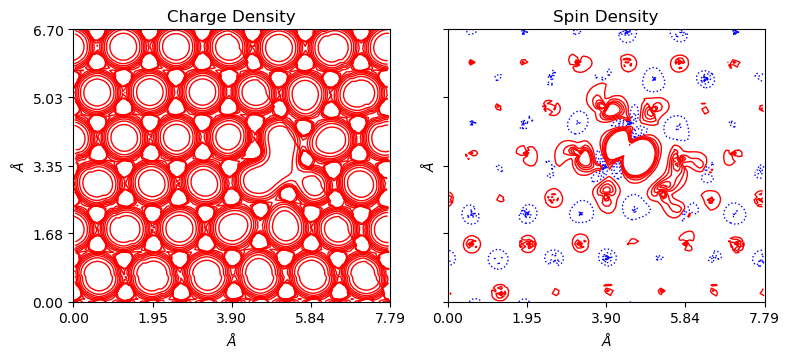

In [10]:
from CRYSTALpytools.electronics import ChargeDensity
import numpy as np

chglevel = np.log(np.linspace(1, 10, 10))
spinlevel = np.linspace(-0.05, 0.05, 10)

chg = ChargeDensity.from_file('dens_grapheneMV.f25', output='dens_grapheneMV.out')
fig = chg.plot_2D(levels=[chglevel, spinlevel], figsize=[8, 6], lineplot=True, colorplot=False,
                  a_range=[-0.3, 0.7], b_range=[-0.1, 0.9], rectangle=True)

With `a_range` and `b_range`, one can also plot supercells. Set `edgeplot=True` to mark unit cell boundaries, which is not influanced by 'range' or 'rectangle' options.

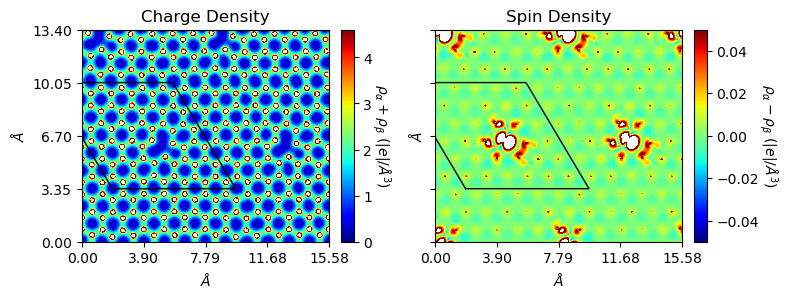

In [11]:
from CRYSTALpytools.electronics import ChargeDensity
import numpy as np

chglevel = np.log(np.linspace(1, 100, 100))
spinlevel = np.linspace(-0.05, 0.05, 100)

chg = ChargeDensity.from_file('dens_grapheneMV.f25', output='dens_grapheneMV.out')
fig = chg.plot_2D(levels=[chglevel, spinlevel], figsize=[8, 6],
                  a_range=[-0.5, 1.5], b_range=[-0.5, 1.5],
                  rectangle=True, edgeplot=True)

### Analysis

As has illustrated above, the `sustract()` method helps to generate difference maps. The `alpha_beta()` method splits $\alpha$ and $\beta$ densities into the original charge and spin densities.

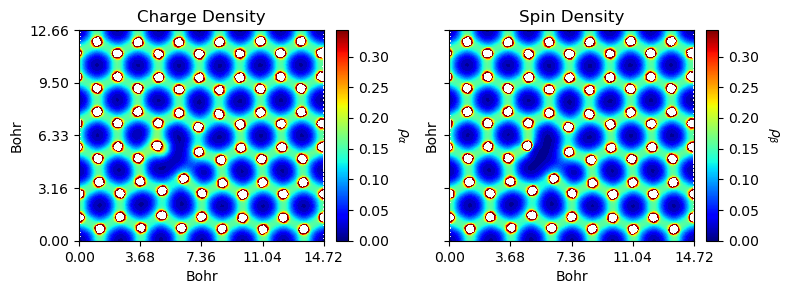

In [12]:
from CRYSTALpytools.electronics import ChargeDensity
import numpy as np

chglevel = np.log(np.linspace(1, 10, 100)) * 0.53**3 # roughly convert AA^-3 to Bohr^-3

chg = ChargeDensity.from_file('dens_grapheneMV.f25', method='alpha_beta',
                              output='dens_grapheneMV.out')
fig = chg.plot_2D(unit='a.u.', levels=[chglevel, chglevel], figsize=[8, 6],
                  cbar_label=[r'$\rho_{\alpha}$', r'$\rho_{\beta}$'],
                  rectangle=True, add_title=False)

### Conversion to XSF

The `to_xsf()` method helps to write 2D/3D charge/spin densities into the [XCrySDen](http://www.xcrysden.org/) XSF format for visualization and analysis. Such file format is accepted by many popular modelling software such as [XCrySDen](http://www.xcrysden.org/), [VMD](https://www.ks.uiuc.edu/Research/vmd/) and [VESTA](https://jp-minerals.org/vesta/en/).

**NOTE**

For 3D data grid, if CUBE file(s) are read without output, the XSF file output has the 3D 'CRYSTAL' periodicity. As far as the authors have been aware of, this only causes Segmentation Fault of XCrySDen 1.6.2 when dealing with low dimensional systems. Available solution includes:

1. including output file  
2. using other software such as VESTA  
3. changing the keyword manually.

Convert the same system into XSF format with 2D data grid.

In [1]:
from CRYSTALpytools.electronics import ChargeDensity

chg = ChargeDensity.from_file('dens_grapheneMV.f25', output='dens_grapheneMV.out')
chg.to_xsf('dens_grapheneMV.xsf')

Visualize spin densities in XCrySDen.

<img src="./dens_grapheneMV.png" width="480">

Get charge density difference before and after CO adsoprtion onto the MgO $(001)$ 2 layers slab.

In [2]:
from CRYSTALpytools.electronics import ChargeDensity

dchg = ChargeDensity.from_file('dens_MgOCO.cube', 'dens_MgO.cube', 'dens_CO.cube',
                               output='dens_MgOCO.out', method='substract')
dchg.to_xsf('dens_dMgOCO.xsf')

Visualize charge density difference in VESTA. The cell has been expanded 3 times in both directions.

<img src="./dens_dMgOCO.png" width="480">

## The 'plot.plot_ECHG()' function

The `plot.plot_ECHG()` function enables a higher-level of plotting. It accepts extendable length of 'fort.25' files or `ChargeDensity` objects.

### Single-system charge / spin density.

By default the charge / spin densities of a single sysmtem is plotted, as the example showed above.

### Multi-system charge / spin densities

`plot_ECHG()` can read entries of arbitrary length and return to the matplotlib Figure object with subplots. For comparison, the uniform scale can be used by setting `levels`.

/home/huanyu/apps/anaconda3/envs/crystal_py3.9/lib/python3.9/site-packages/CRYSTALpytools/electronics.py:535: UserWarning: Properties output file not found: Only the first 1 (2) density map(s) will be read for spin=1(2).
  cls = Properties_output(output).read_ECHG(*files, method=method)


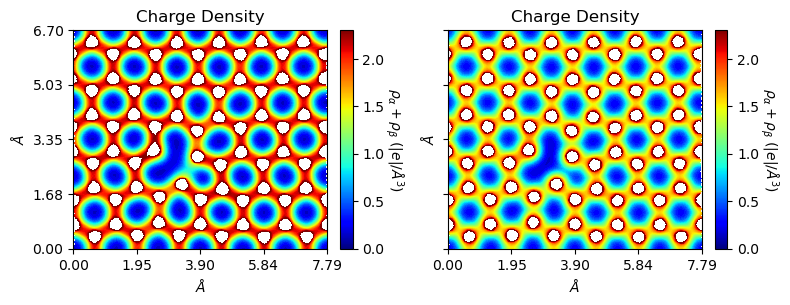

In [13]:
from CRYSTALpytools.plot import plot_ECHG
import numpy as np

chglevel = np.log(np.linspace(1, 10, 100))
files = ['dens_grapheneMV.f25', 'dens_grapheneMV_PATO.f25']

figs = plot_ECHG(*files, option='charge', levels=chglevel,
                 rectangle=True, figsize=[8, 6])

With `option='diff'`, the user can quickly plot charge difference maps. It returns to non spin-polarized solution (`obj.spin=1`) as only charge density difference is considered. 

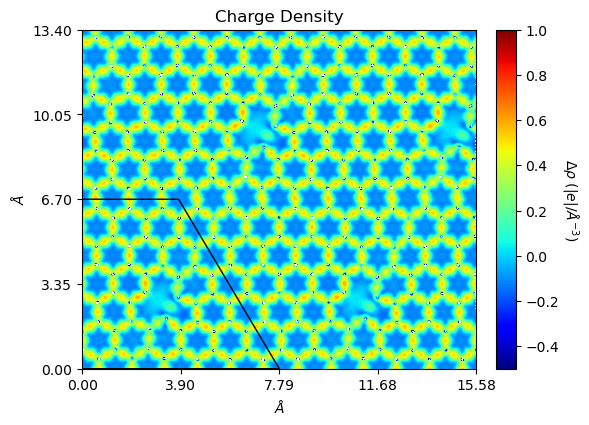

In [14]:
from CRYSTALpytools.plot import plot_ECHG
import numpy as np

chglevel = np.linspace(-0.5, 1, 100)
files = ['dens_grapheneMV.f25', 'dens_grapheneMV_PATO.f25']

figs = plot_ECHG(*files, option='diff', levels=chglevel, rectangle=True,
                 a_range=[0, 2], b_range=[0, 2], edgeplot=True, figsize=[6, 6],
                 add_title=False, cbar_label=r'$\Delta\rho$ ($|e|/\AA^{-3}$)')

If the object is generated with 'substract' method, plot it with 'charge' or 'both' will get charge density differences.

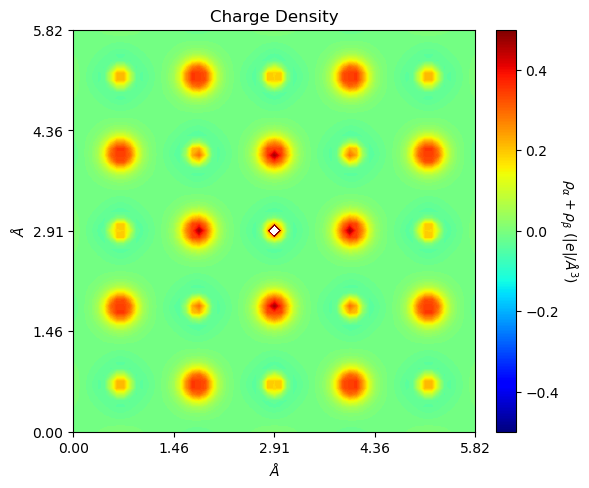

In [15]:
from CRYSTALpytools.electronics import ChargeDensity
from CRYSTALpytools.plot import plot_ECHG
import numpy as np

chglevel = np.linspace(-0.5, 0.5, 100)
dchg = ChargeDensity.from_file('dens_mgoDCHG.f25', output='dens_mgoDCHG.out',
                               method='substract')
fig = plot_ECHG(dchg, option='charge', levels=chglevel, figsize=[6, 6])

For more details, please refer to the [API documentations](https://crystal-code-tools.github.io/CRYSTALpytools/crystalpytools.electronics.html).